In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import pylab
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [4]:
test_df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


In [5]:
train_df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [6]:
test_df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [7]:
target_cat_to_num = {'0-10':0,'11-20':1,'21-30':2,'31-40':3,'41-50':4,'51-60':5,'61-70':6,'71-80':7,'81-90':8,'91-100':9,'More than 100 Days':10}
target_num_to_cat = {0:'0-10',1:'11-20',2:'21-30',3:'31-40',4:'41-50',5:'51-60',6:'61-70',7:'71-80',8:'81-90',9:'91-100',10:'More than 100 Days'}

In [8]:
train_df['Stay'] = train_df['Stay'].map(target_cat_to_num)

In [9]:
train_df['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

In [10]:
train_df['City_Code_Patient'].value_counts()[:5]

8.0    124011
2.0     38869
1.0     26377
7.0     23807
5.0     20079
Name: City_Code_Patient, dtype: int64

In [11]:
train_df['Bed Grade'] = train_df['Bed Grade'].fillna(2.0)
test_df['Bed Grade'] = test_df['Bed Grade'].fillna(2.0)

In [12]:
train_df['City_Code_Patient'] = train_df['City_Code_Patient'].fillna(8.0)
test_df['City_Code_Patient'] = test_df['City_Code_Patient'].fillna(8.0)

In [13]:
y = train_df['Stay']
train_df.drop(['case_id','patientid','Stay'],axis=1,inplace=True)

In [14]:
num_feature = [feature for feature in train_df.columns if train_df[feature].dtype != 'O' ]

In [15]:
num_feature

['Hospital_code',
 'City_Code_Hospital',
 'Available Extra Rooms in Hospital',
 'Bed Grade',
 'City_Code_Patient',
 'Visitors with Patient',
 'Admission_Deposit']

In [16]:
num_feature = [feature for feature in num_feature if  feature not in ['Hospital_code','City_Code_Hospital','City_Code_Patient']]

In [17]:
num_feature

['Available Extra Rooms in Hospital',
 'Bed Grade',
 'Visitors with Patient',
 'Admission_Deposit']

In [18]:
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()

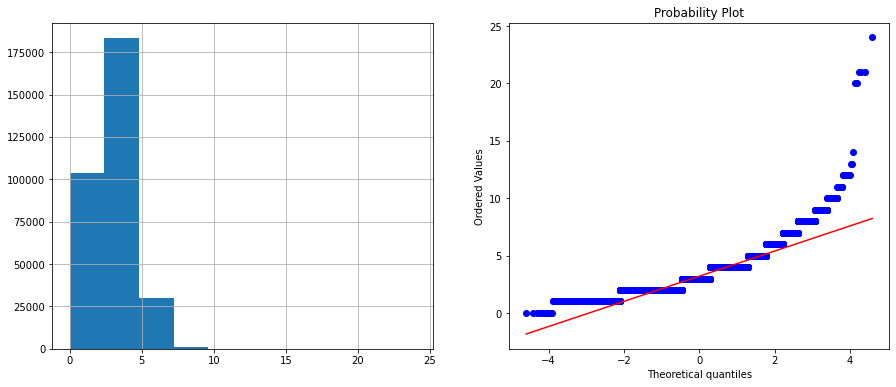

In [19]:
diagnostic_plots(train_df, 'Available Extra Rooms in Hospital')

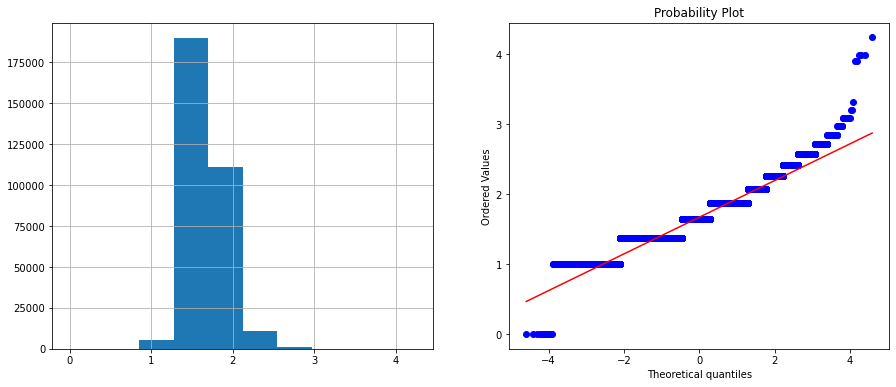

In [20]:
train_df['Available Extra Rooms in Hospital'] = (train_df['Available Extra Rooms in Hospital'])**(1/2.2)
test_df['Available Extra Rooms in Hospital'] = (test_df['Available Extra Rooms in Hospital'])**(1/2.2)

diagnostic_plots(train_df, 'Available Extra Rooms in Hospital')

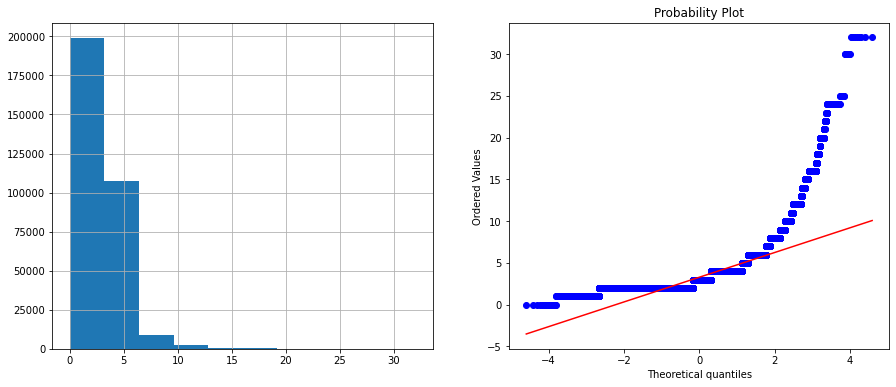

In [21]:
diagnostic_plots(train_df, 'Visitors with Patient')

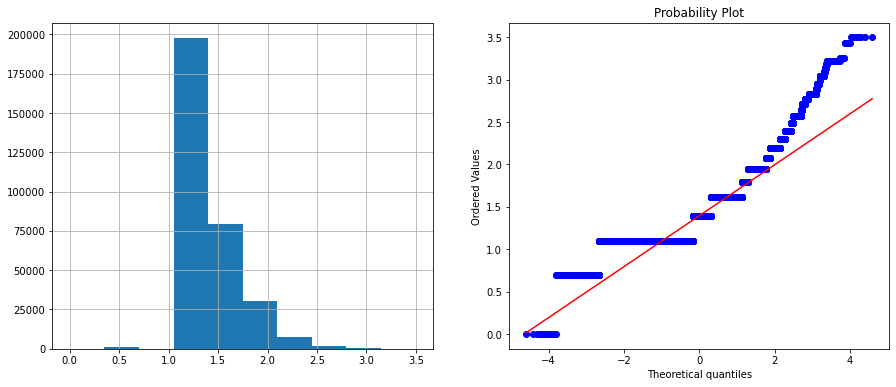

In [22]:
train_df['Visitors with Patient'] = np.log1p(train_df['Visitors with Patient'])
test_df['Visitors with Patient'] = np.log1p(test_df['Visitors with Patient'])

diagnostic_plots(train_df, 'Visitors with Patient')

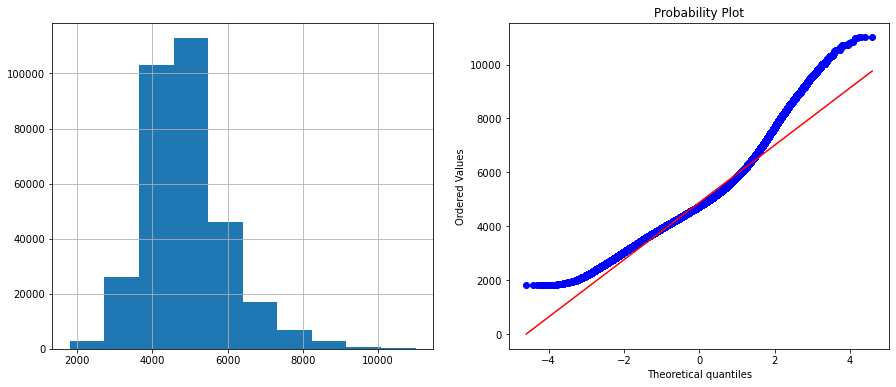

In [23]:
diagnostic_plots(train_df, 'Admission_Deposit')

#temp = train_df['Admission_Deposit'].copy()
train_df['Admission_Deposit'] = temp.copy()

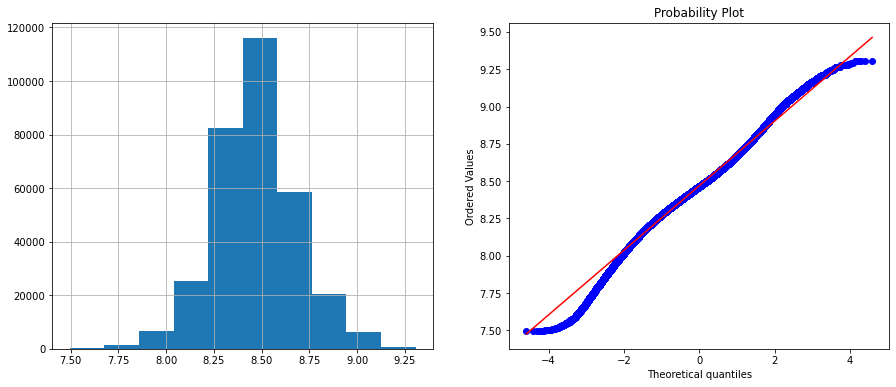

In [24]:
train_df['Admission_Deposit'] = np.log(train_df['Admission_Deposit'])
test_df['Admission_Deposit'] = np.log(test_df['Admission_Deposit'])

diagnostic_plots(train_df, 'Admission_Deposit')

In [25]:
cat_feature = [ feature for feature in train_df.columns if train_df[feature].dtype== 'O' or feature not in num_feature]

In [26]:
cat_feature

['Hospital_code',
 'Hospital_type_code',
 'City_Code_Hospital',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'City_Code_Patient',
 'Type of Admission',
 'Severity of Illness',
 'Age']

In [27]:
train_df['Severity of Illness'] = train_df['Severity of Illness'].map({'Minor':0,'Moderate':1,'Extreme':2})
test_df['Severity of Illness'] = test_df['Severity of Illness'].map({'Minor':0,'Moderate':1,'Extreme':2})

In [28]:
train_df['Age'] = train_df['Age'].map({'0-10':0,'11-20':1,'21-30':2,'31-40':3,'41-50':4,'51-60':5,'61-70':6,'71-80':7,'81-90':8,'91-100':9})
test_df['Age'] = test_df['Age'].map({'0-10':0,'11-20':1,'21-30':2,'31-40':3,'41-50':4,'51-60':5,'61-70':6,'71-80':7,'81-90':8,'91-100':9})

In [29]:
cat_feature = [ feature for feature in cat_feature if feature not in ['Severity of Illness','Age']]

In [30]:
cat_feature

['Hospital_code',
 'Hospital_type_code',
 'City_Code_Hospital',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'City_Code_Patient',
 'Type of Admission']

In [31]:
rem_feature = [ feature for feature in train_df.columns if feature not in cat_feature]

In [32]:
rem_feature

['Available Extra Rooms in Hospital',
 'Bed Grade',
 'Severity of Illness',
 'Visitors with Patient',
 'Age',
 'Admission_Deposit']

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
train_df[rem_feature] = scaler.fit_transform(train_df[rem_feature])
test_df[rem_feature] = scaler.transform(test_df[rem_feature])

In [35]:
train_df_full = pd.get_dummies(train_df['Hospital_code'],drop_first=True)
for feature in cat_feature[1:]:
    train_df_full = pd.concat([train_df_full,pd.get_dummies(train_df[feature],drop_first=True)],axis=1)

In [36]:
test_df_full = pd.get_dummies(test_df['Hospital_code'],drop_first=True)
for feature in cat_feature[1:]:
    test_df_full = pd.concat([test_df_full,pd.get_dummies(test_df[feature],drop_first=True)],axis=1)

In [37]:
X = pd.concat([train_df_full,train_df[rem_feature]],axis=1)
test_X = pd.concat([test_df_full,test_df[rem_feature]],axis=1)

In [38]:
X

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,b,c,d,e,f,g,2,3,4,5,6,7,9,10,11,13,Y,Z,anesthesia,gynecology,radiotherapy,surgery,Q,R,S,T,U,B,C,D,E,F,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,Trauma,Urgent,Available Extra Rooms in Hospital,Bed Grade,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.388602,0.333333,1.0,0.314203,0.555556,0.554269
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.323194,0.333333,1.0,0.314203,0.555556,0.660621
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.323194,0.333333,1.0,0.314203,0.555556,0.535280
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.323194,0.333333,1.0,0.314203,0.555556,0.771050
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.323194,0.333333,1.0,0.314203,0.555556,0.622614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.388602,1.000000,0.5,0.396480,0.444444,0.460492
318434,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.323194,1.000000,0.5,0.460299,0.888889,0.725727
318435,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.388602,1.000000,0.0,0.396480,0.777778,0.472487
318436,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.388602,0.666667,0.0,0.512443,0.111111,0.406938


In [39]:
test_X

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,b,c,d,e,f,g,2,3,4,5,6,7,9,10,11,13,Y,Z,anesthesia,gynecology,radiotherapy,surgery,Q,R,S,T,U,B,C,D,E,F,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,Trauma,Urgent,Available Extra Rooms in Hospital,Bed Grade,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.388602,0.333333,0.5,0.314203,0.777778,0.299310
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.323194,0.333333,0.5,0.460299,0.777778,0.443440
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.388602,1.000000,0.5,0.396480,0.777778,0.505022
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.388602,0.333333,0.5,0.396480,0.777778,0.464343
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.323194,0.333333,0.5,0.460299,0.777778,0.462753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.442889,0.666667,0.0,0.460299,0.444444,0.692953
137053,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.323194,1.000000,0.5,0.314203,0.000000,0.368796
137054,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.323194,1.000000,0.0,0.314203,0.000000,0.764788
137055,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.323194,1.000000,0.0,0.314203,0.444444,0.610256


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

In [42]:
#from imblearn.combine import SMOTETomek
#from imblearn.over_sampling import RandomOverSampler
#from collections import Counter

In [43]:
#sampler = RandomOverSampler({ 4:15000, 7: 13000, 10:10000, 8: 5000, 9:6000, 6:5000})

In [44]:
#sampler = SMOTETomek({ 5:30000, 0:30000, 4:30000, 7: 30000, 10:30000, 8: 30000, 9:30000, 6:30000})

In [45]:
#print(Counter(y))

In [46]:
#X_train_sampler,y_train_sampler = sampler.fit_sample(np.array(X_train),pd.Series(y_train))

In [47]:
#print(Counter(y_train_sampler))

In [48]:
#from sklearn.ensemble import AdaBoostClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from AutoEnsembler.AutoEn import AutoEnClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [49]:
#model = MultinomialNB()
model = AutoEnClassifier(random_state=7)

C:\Users\aarti\anaconda3\lib\site-packages\AutoEnsembler\AutoEn.py:85: UserWarning: model will use RandomizedSearch
  warnings.warn('model will use RandomizedSearch')


params = {}
params['learning_rate'] = 0.1
params['max_depth'] = 18
params['n_estimators'] = 700
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['colsample_bytree']=1
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 2
params['reg_lambda'] = 2

In [50]:
#model = LGBMClassifier(**params,class_weight={ 10:1.2, 8: 1.5, 9:2, 6:2})

In [52]:
model.fit(np.array(X)[:20000],y[:20000])
y_predict = model.predict(test_X)

LR_score : 0.40125
RF_score : 0.2915
AutoEn_score : 0.4025
weight for LR_score : 0.7
weight for RF_score : 0.3


In [ ]:
accuracy_score(y_test,y_predict)

In [ ]:
print(classification_report(y_test,y_predict))

In [ ]:
f1_score(y_test,y_predict,average='macro')

In [64]:
y_predict = pd.Series(y_predict)
y_predict = y_predict.map(target_num_to_cat)
y_predict

0          0-10
1         51-60
2         21-30
3         21-30
4         51-60
          ...  
137052    21-30
137053     0-10
137054    11-20
137055    11-20
137056    51-60
Length: 137057, dtype: object

In [65]:
sub = pd.read_csv('sample_submission_lfbv3c3.csv')

In [66]:
sub

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,0-10
137055,455494,0-10


In [67]:
sub['Stay'] = y_predict

In [68]:
sub.to_csv('submission.csv',index=False)

In [69]:
sub1 = pd.read_csv('submission.csv')

In [70]:
sub1['Stay'].value_counts()

21-30                 58763
11-20                 38266
51-60                 18838
31-40                 12993
0-10                   4320
More than 100 Days     2203
81-90                  1007
71-80                   525
41-50                    71
91-100                   62
61-70                     9
Name: Stay, dtype: int64